# 03

In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

### 데이터 읽기

In [2]:
import pandas as pd
ul = pd.read_csv('use_log.csv')
cust_m = pd.read_csv('customer_master.csv')
class_m = pd.read_csv('class_master.csv')
camp_m = pd.read_csv('campaign_master.csv')

display(ul.head(), cust_m.head())

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [3]:
display(class_m,camp_m)

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 고객현황 데이터 가공(데이터 조인)

In [4]:
cust_join = pd.merge(cust_m, class_m, on='class', how='left')
cust_join = pd.merge(cust_join, camp_m, on='campaign_id', how='left')
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [5]:
print(len(cust_m))
print(len(cust_join)) # 행 개수는 변함X, cust_m을 기준으로 조인했다

4192
4192


In [6]:
#결측치 확인
cust_join.isna().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [7]:
cust_join['customer_id'].nunique() # 전부 고유한 고객만 있음
#cust_m과 customer_id 개수가 똑같아서 고유한 고객만 있다

4192

### 새로 만든 고객 데이터 집계

In [8]:
cust_join.head()


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [9]:
# 회원 구분 현황 - class_name별로 customer_id가 몇개씩 있는가 비율
cust_join.groupby('class_name')['customer_id'].count()

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [10]:
#회원권 종류별 차지하는 비율
round((cust_join.groupby('class_name')['customer_id'].count()/cust_join.shape[0])*100,1)
#전체 개수에서 회원권 종류별로 나눈 뒤 백분율로 소수점 첫째자리까지만 나타냄

class_name
0_종일    48.8
1_주간    24.3
2_야간    26.9
Name: customer_id, dtype: float64

In [11]:
# 캠페인 구분 현황
round((cust_join.groupby('campaign_name')['customer_id'].count() / cust_join.shape[0]) *100,1)

campaign_name
0_입회비반액할인    15.5
1_입회비무료      11.7
2_일반         72.8
Name: customer_id, dtype: float64

In [12]:
# 성별 현황
round((cust_join.groupby('gender')['customer_id'].count() / cust_join.shape[0]) *100,1)
#남자는 47.3% 여자 52.7%

gender
F    47.3
M    52.7
Name: customer_id, dtype: float64

In [13]:
# 탈퇴자 현황
round((cust_join.groupby('is_deleted')['customer_id'].count() / cust_join.shape[0]) *100,1)
# 0 : 유지(67.8%), 1 : 탈퇴(32.2%)

is_deleted
0    67.8
1    32.2
Name: customer_id, dtype: float64

### 최신 고객 데이터 집계

In [14]:
#2019.03데이터만 뽑아서 상황 파악
# 1. end_date가 2019.03.31년 이후, 2.탈퇴 X(NaN값)
cust_join['start_date'] = pd.to_datetime(cust_join['start_date'])
cust_join['end_date'] = pd.to_datetime(cust_join['end_date']) # end_date를 datetime으로 바꿈
cust_new = cust_join[(cust_join['end_date'] >= pd.to_datetime('20190331')) | (cust_join['end_date'].isnull())]
cust_new


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


In [15]:
cust_new['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [16]:
#최신데이터인 cust_new에서 비율 찾기
# 최신회원권에서 class_name의 개수
cust_new.groupby('class_name')['customer_id'].count()

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [17]:
round((cust_new.groupby('class_name')['customer_id'].count() / cust_new.shape[0])*100,1)

class_name
0_종일    48.9
1_주간    23.6
2_야간    27.5
Name: customer_id, dtype: float64

In [18]:
#프로모션 비율
round((cust_new.groupby('campaign_name')['customer_id'].count() / cust_new.shape[0]) *100,1)

campaign_name
0_입회비반액할인    10.5
1_입회비무료       8.2
2_일반         81.3
Name: customer_id, dtype: float64

In [19]:
round((cust_new.groupby('gender')['customer_id'].count() / cust_new.shape[0]) *100,1)

gender
F    47.4
M    52.6
Name: customer_id, dtype: float64

### 결론 : 입회 캠페인은 회원 비율 변화에 영향을 미친다

### 이용이력 데이터를 집계

In [20]:
ul.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [21]:
ul['usedate'] = pd.to_datetime(ul['usedate'])
#연월로 변경
ul['연월'] = ul['usedate'].dt.strftime('%Y%m')
ul.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [22]:
#여누얼, 고객별 이용횟수를 알아보자!
ul_month = ul.groupby(['연월', 'customer_id'], as_index=False).count()
#as_index = False 인자를 넣으면 연월, customer_id가 인덱스가 아니게 됨 주의점은 groupby메서드 안에 넣기
#as_index = False 인자를 넣으면 연월,customer_id가 인덱스가 아니게 됨, 주의점 groupby메서드 안에 넣기!
ul_month

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [23]:
#log_id -> cnt 변경
ul_month.rename(columns = {'log_id':'cnt'}, inplace=True)
#usedate열 삭제
ul_month.drop('usedate', axis=1, inplace=True)
ul_month.head()

,연월,customer_id,cnt
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [24]:
#고객별 월평균 사용횟수
# 고객별 평균, 중앙, 최댓, 최솟값을 집계
import numpy as np
ul_month.groupby('customer_id')['cnt'].agg([np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [25]:
ul_cust = ul_month.groupby('customer_id')['cnt'].agg([np.mean, np.median, np.max, np.min])
#인덱스 삭제 (기준 인덱스는 버리지 않는다)
ul_cust = ul_cust.reset_index(drop=False)
ul_cust.head() # 최종적으로 고객별로 평균 중위 최대 최소 월 사용수

,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### 이용이력 데이터로부터 정기 이용 플래그 작성(0-1 coding)을 작성

In [26]:
# 월/요일별로 방문한 횟수의 최댓값이 4이상인 요일이 하나라도 있으면 플래그 1 - 정기적으로 이용

In [27]:
#앞에서 월은 뽑았는데 요일이 없다
ul['weekday'] = ul['usedate'].dt.weekday # 요일이다 월 : 0 ~ 일 :6
ul.head()

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [28]:
# 고객별, 월별, 요일별 방문횟수 가운트
ul_week = ul.groupby(['customer_id', '연월', 'weekday'], as_index=False).count()
ul_week.rename(columns = {'log_id':'cnt'}, inplace=True)
del ul_week['usedate']
ul_week.head()

,customer_id,연월,weekday,cnt
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [29]:
ul_week = ul_week.groupby('customer_id', as_index=False)[['cnt']].max()
ul_week

,customer_id,cnt
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [30]:
### 1. apply lambda 사용하기
ul_week['flag'] = ul_week['cnt'].apply(lambda x:1 if x>=4 else 0)
# ul_week['cnt']가 if x>=4 이상이면 lambda값에 (flag)에1을 넣고 아닌 것은 0을 넣음
ul_week.head()

,customer_id,cnt,flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [31]:
### 두번째 방법: 불린 인덱싱
ul_week['flag'] = 0
#불린 변수(cnt가 4이상인 변수의 인덱스 True)
is_over4 = (ul_week['cnt']>=4)
#위의 인덱스로 인덱싱
ul_week.loc[(is_over4), 'flag'] = 1
ul_week.head()

,customer_id,cnt,flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [32]:
### 세번째 방법:where문 사용
ul_week['flag'] = 0
ul_week['flag'] = ul_week['flag'].where(ul_week['cnt']<4,1)#조건이 참이면 0이고 거짓이면 1
ul_week.head()

,customer_id,cnt,flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### 고객데이터와 이용이력 데이터를 조인

In [33]:
display(cust_join.head(), ul_cust.head(), ul_week.head())

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반


,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


,customer_id,cnt,flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [34]:
#customer_id로 데이터 조인하자
cust_join = pd.merge(cust_join, ul_cust, on = 'customer_id', how='left')
cust_join = pd.merge(cust_join, ul_week[['customer_id', 'flag']], on = 'customer_id', how='left') #ul_week에서 cnt 열을 버린다
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [35]:
print(len(cust_join))

4192


In [36]:
cust_join.isnull().sum() #처음에 본 데이터와 동일하게 end_date에만 2842개 결측치가 있다

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amax                0
amin                0
flag                0
dtype: int64

### 회원 기간을 계산하다

In [37]:
# 회원기간 : 탈퇴일 - 가입일
# 2019-03-31은 진짜 탈퇴한 사람도 있어서 아싸리 2019-04-30지정
# cal_date를 end_date로 임의로 넣어두기
cust_join['cal_date'] = cust_join['end_date']
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,NaT
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,NaT
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,NaT
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,NaT
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,NaT


In [38]:
#end_date가 비워진 경우, cal_date엔 2019-04-30로 채운다
cust_join['cal_date'].fillna(pd.to_datetime('20190430'), inplace=True)
cust_join.head()


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30


In [39]:
#회원기간을 계산하는 'mem_period' 컬럼 추가
cust_join['mem_period'] = (cust_join['cal_date'] - cust_join['start_date']) / np.timedelta64(1, 'M') #단위가 '월'이므로 추가
#python days to months로 바꾸는 법 np.timedelta(1,'M')로 나누기
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date,mem_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47.968131
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47.968131
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47.968131
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47.968131
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47.968131


In [40]:
## 다른 방법(relativedelta 사용)
### relativedelta 날짜 차이 계산
from dateutil.relativedelta import relativedelta
cust_join['mem_period'] = 0
for i in range(len(cust_join)):
    delta = relativedelta(cust_join.loc[i, 'cal_date'], cust_join.loc[i, 'start_date']) # 두 기간의 차이를 계산
    cust_join.loc[i, 'mem_period'] = delta.years*12 + delta.months #위의 delta값을 mem_period에 넣음 (단위:month)
cust_join.head()
#cal_date에서 start_date의 차이를 계산하여 delta라는 변수에 넣고 mem_period변수 안에 이 delta 값을 넣어주는 데 여기엔 year와 month 모두 들어 있으므로 단위를 month로 하기 위해 year*12 month는 더해준다

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date,mem_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


### 고객 행동의 각종 통계량 파악

In [42]:
cust_join[['mean', 'median', 'amax', 'amin']].describe()

,mean,median,amax,amin
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [43]:
# 전체 고객 대상 flag 현황(지속적 이용하는 사람(flag=1)의 비율은?)
round(cust_join.groupby('flag').count()['customer_id'] / cust_join.shape[0] *100,1)
# 4번 이하 : 18.6%, 4번 이상 : 81.4%

flag
0    18.6
1    81.4
Name: customer_id, dtype: float64

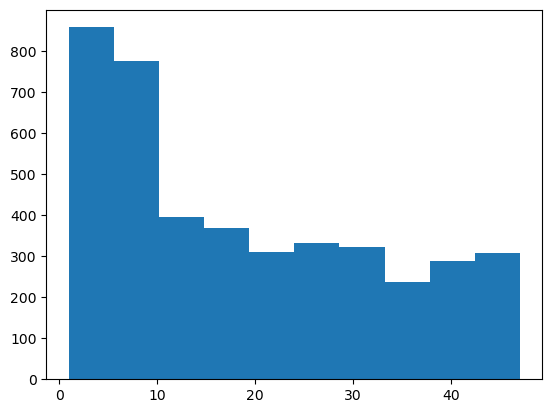

In [44]:
# 시각화
import matplotlib.pyplot as plt
plt.hist(cust_join['mem_period'])
plt.show()

### 탈퇴하는 회원과 지속 회원의 차이

In [45]:
# 탈퇴한 사람은 is_deleted = 1, 지속회원은 0이다
#통계량 살펴보기
cust_join[cust_join['is_deleted'] == 1].describe()
#탈퇴 회원 통계량

,is_deleted,price,mean,median,amax,amin,flag,mem_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [46]:
#지속회원
cust_join[cust_join['is_deleted'] == 0].describe()

,is_deleted,price,mean,median,amax,amin,flag,mem_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
